 we will do small image classification using CIFAR10 dataset in tensorflow. We will use convolutional neural network for this image classification problem. First we will train a model using simple artificial neural network and then check how the performance looks like and then we will train a CNN and see how the model accuracy improves. This tutorial will help you understand why CNN is preferred over ANN for image classification. 


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

training samples are 32*32 image_name

we see there are 50000 training images and 1000 test images

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array


In [13]:
y_train = y_train.reshape(-1)
y_train[:5]
# now a one dimensional array

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


In [15]:
classes[1]

'automobile'

In [16]:
# draw all image with functions
def plot_sample(X, y, index):
  plt.figure(figsize= (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


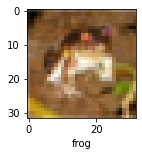

In [18]:
plot_sample(X_train, y_train, 0)

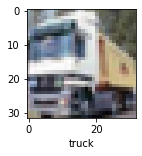

In [20]:
plot_sample(X_train, y_train, 1)

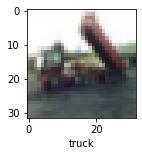

In [21]:
plot_sample(X_train, y_train, 2)

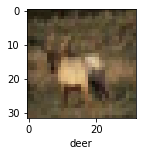

In [22]:
plot_sample(X_train, y_train, 3)

# normalize our data(scaling)

In [25]:
# divide each pixel value by 255 normalize in 0-1 range
X_train = X_train/255
X_test = X_test/255

# build ANN first and see perfomance

In [29]:
ann = models.Sequential([
                         layers.Flatten(input_shape= (32,32,3)),
                         layers.Dense(3000, activation= 'relu'),
                         layers.Dense(1000, activation= 'relu'),
                         layers.Dense(10, activation= 'sigmoid')
])

ann.compile(optimizer= 'SGD',
           loss= 'sparse_categorical_crossentropy',
           metrics= ['accuracy'])

ann.fit(X_train, y_train, epochs= 5)

Epoch 1/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.8133 - accuracy: 0.3554
Epoch 2/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.6246 - accuracy: 0.4275
Epoch 3/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.5413 - accuracy: 0.4568
Epoch 4/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4828 - accuracy: 0.4774
Epoch 5/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4303 - accuracy: 0.4960


low accuracy of 49.6% on training set with 5 epochs

In [30]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 8s 25ms/step - loss: 1.4537 - accuracy: 0.4832


[1.4536852836608887, 0.4832000136375427]

low accuracy of 48.32% on test set

In [32]:
# classification report
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.46      0.52      1000
           1       0.69      0.50      0.58      1000
           2       0.39      0.33      0.36      1000
           3       0.33      0.39      0.36      1000
           4       0.44      0.46      0.45      1000
           5       0.36      0.47      0.41      1000
           6       0.64      0.38      0.48      1000
           7       0.61      0.51      0.55      1000
           8       0.48      0.75      0.58      1000
           9       0.53      0.58      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



# Now let us build a convolutional neural network to train our images

infront of our current dense network, add some convolution and pooling layers


In [33]:
cnn = models.Sequential([
                         #cnn layer 1
                         layers.Conv2D(filters= 32, kernel_size= (3,3), activation= 'relu', input_shape= (32, 32, 3) ), #convoltion is detecting the features, filters detect 32 different features using 3*3 filter
                         layers.MaxPooling2D(2,2),

                         #cnn layer 2
                         layers.Conv2D(filters= 64, kernel_size= (3,3), activation= 'relu', input_shape= (32, 32, 3) ), 
                         layers.MaxPooling2D(2,2),


                         #dense
                         layers.Flatten(),#no ned for shape as network will figure out
                         layers.Dense(64, activation= 'relu'),#use one dense nnetwork, cnn does most of the work
                         layers.Dense(10, activation= 'softmax')#softmax normalizes probabilities 
])

sigmoid ouput of probabilites

1:0.45

2:0.67

sum not necesarilly one

softmax

1: (0.45) / (0.45+0.67)
2: (0.67) /(0.45+0.67)

sum is one

In [35]:
cnn.compile(optimizer= 'adam',
            loss= 'sparse_categorical_crossentropy',
            metrics= ['accuracy'])

In [36]:
cnn.fit(X_train, y_train, epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4304 - accuracy: 0.4891
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0750 - accuracy: 0.6246
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9462 - accuracy: 0.6727
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8594 - accuracy: 0.7037
Epoch 5/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.7879 - accuracy: 0.7281
Epoch 6/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.7267 - accuracy: 0.7493
Epoch 7/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.6759 - accuracy: 0.7663
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6269 - accuracy: 0.7813
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.5857 - accuracy: 0.7957
Epoch 10/10
1563/1563 [==============================] - 60s 39m

With CNN, at the end 5 epochs, accuracy was at around 72.81% which is a significant improvement over ANN(49.6%). CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [37]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9396 - accuracy: 0.7017


[0.9395917057991028, 0.70169997215271]

In [38]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

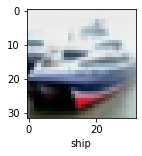

In [39]:
y_test = y_test.reshape(-1)
plot_sample(X_test, y_test, 1)

In [41]:
# use model to predict this
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[5.3766016e-03, 4.4347046e-04, 1.8414607e-03, 9.6348178e-01,
        3.1431296e-04, 1.1070883e-02, 5.7744384e-03, 1.8353375e-04,
        9.8530157e-03, 1.6604953e-03],
       [6.3700834e-04, 2.3796444e-03, 7.8258404e-07, 1.1200927e-06,
        6.5091128e-09, 8.5721412e-09, 1.7533841e-06, 2.8152600e-10,
        9.9693453e-01, 4.5184639e-05],
       [1.4258552e-02, 9.6790031e-02, 2.7885041e-03, 8.0059357e-03,
        9.2116336e-04, 1.4607108e-04, 2.3682795e-03, 6.9725368e-04,
        8.2693565e-01, 4.7088534e-02],
       [5.7481146e-01, 2.3563232e-03, 3.0507226e-02, 4.8032950e-04,
        8.0720233e-03, 1.2810728e-05, 1.0134714e-04, 2.6526491e-04,
        3.8313109e-01, 2.6219600e-04],
       [3.0989108e-07, 4.7426092e-06, 4.8723021e-03, 2.0255169e-02,
        9.5612448e-01, 1.4896820e-03, 1.7246369e-02, 1.3925610e-06,
        4.3793084e-06, 1.2596960e-06]], dtype=float32)

In [44]:
# argmax gives index of max value in an array
# eg.
np.argmax([5,12,1,2])

1

In [45]:
np.argmax(y_pred[0])

3

In [46]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [47]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

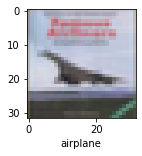

In [52]:
plot_sample(X_test, y_test, 3)

In [49]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [53]:
classes[y_classes[3]]

'airplane'

In [54]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.90      0.71      0.80      1000
           2       0.64      0.57      0.60      1000
           3       0.52      0.52      0.52      1000
           4       0.58      0.76      0.65      1000
           5       0.66      0.55      0.60      1000
           6       0.80      0.72      0.76      1000
           7       0.71      0.79      0.75      1000
           8       0.76      0.86      0.81      1000
           9       0.76      0.81      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

